# Stock prediction analysis


# Getting the Data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


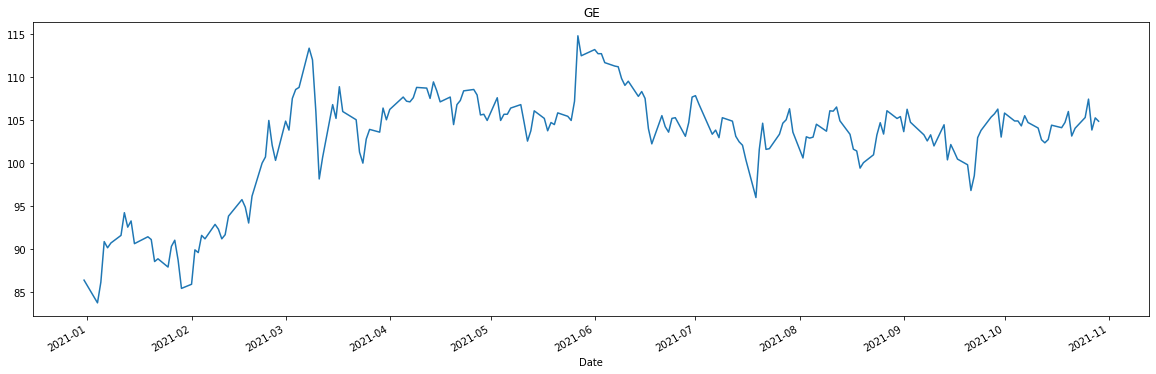

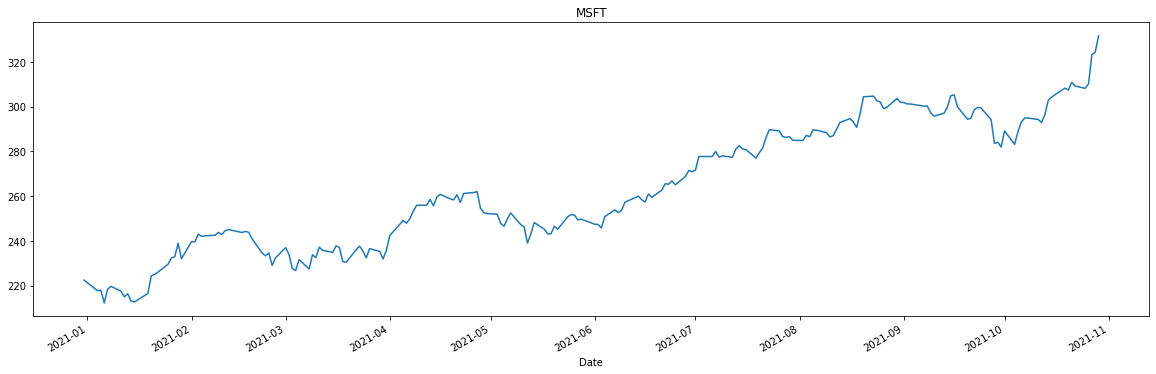

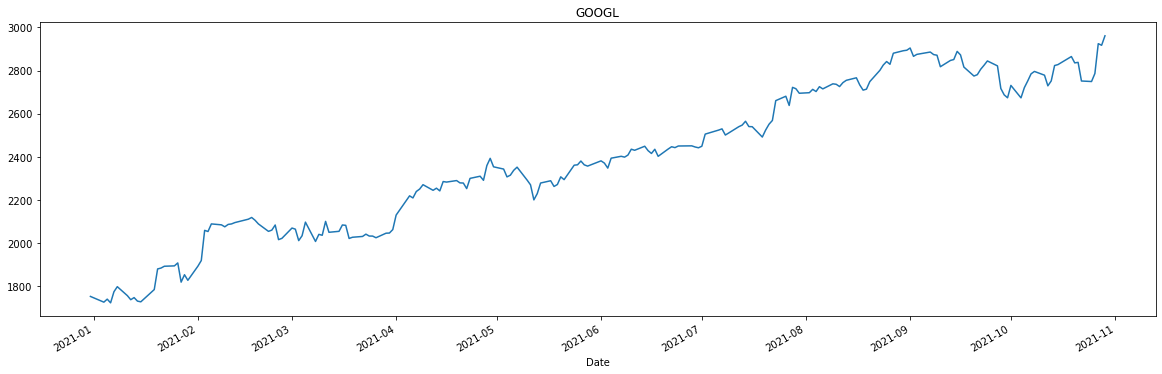

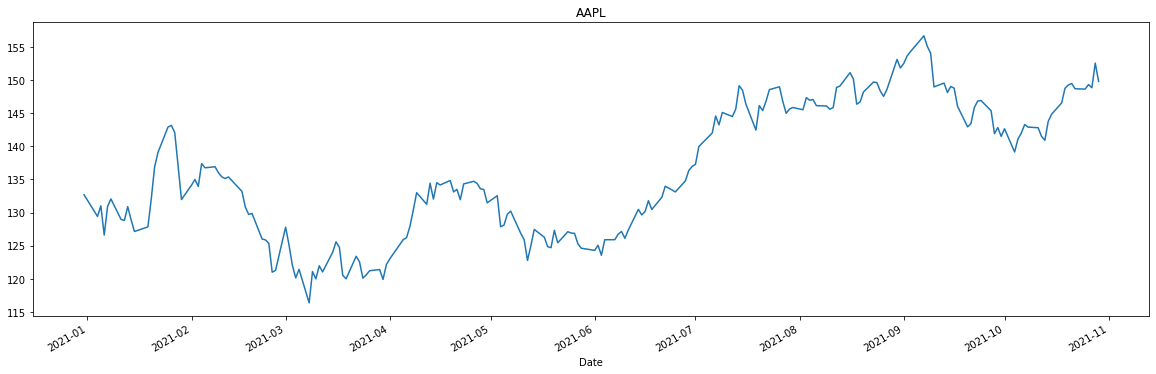

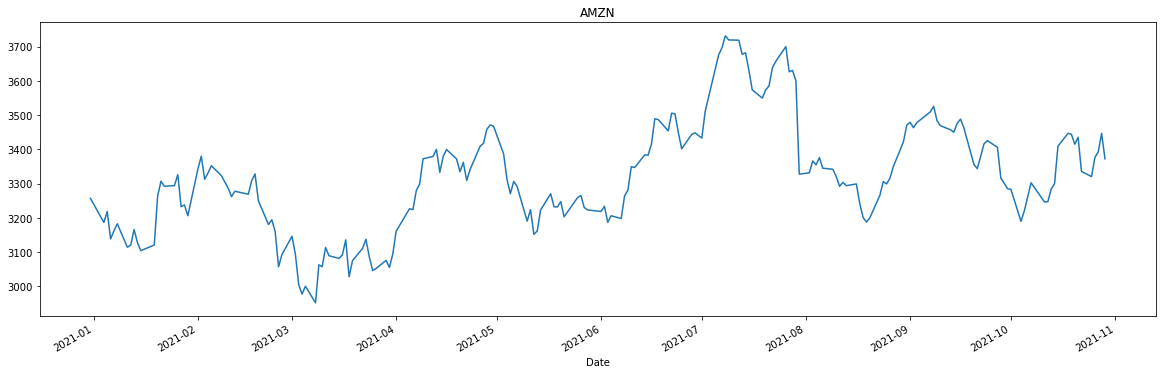

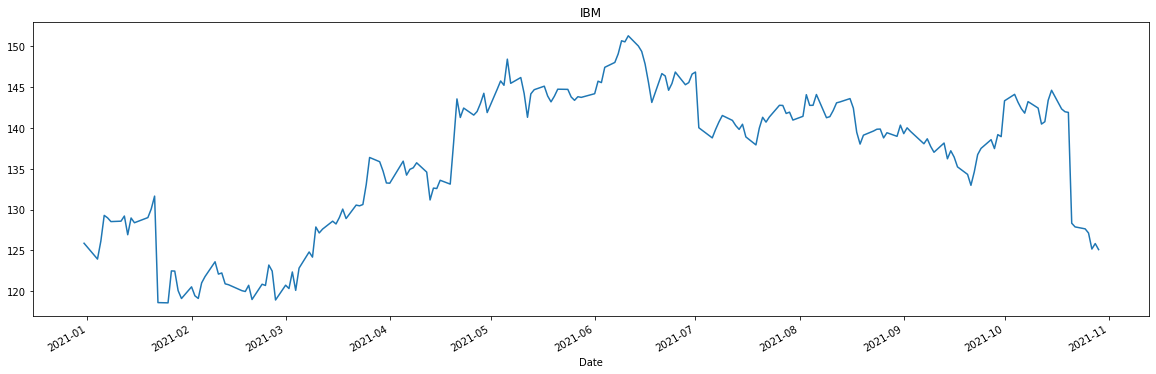

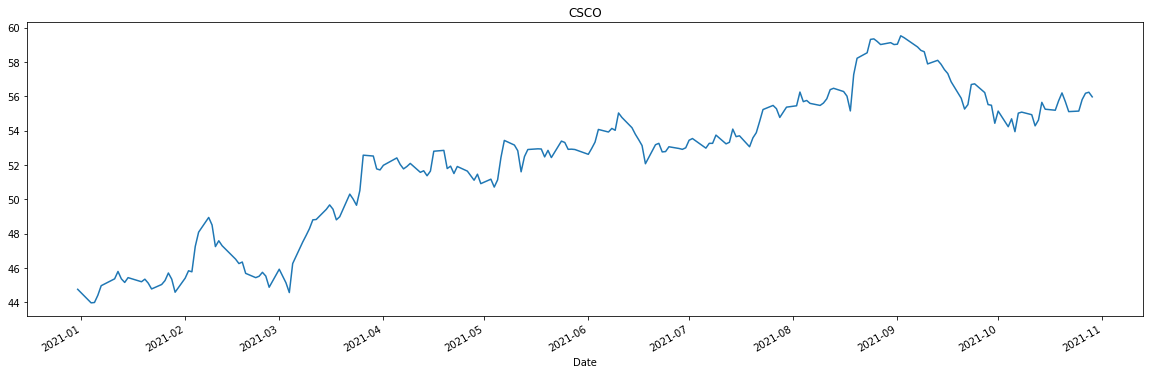

In [6]:
# Import the plotting library
import matplotlib.pyplot as plt
 
# Import the yfinance. If you get module not found error the run !pip install yfinance from your Jupyter notebook
import yfinance as yf  

# Get the data 
stocklist = ["GE", "MSFT", "GOOGL", "AAPL", "AMZN", "IBM", "CSCO"]

data = {}

for stock in stocklist:
    data[stock] = yf.download(stock,'2021-01-01','2021-10-30')
 

for stock in stocklist:
    plt.figure(figsize=(20,6))
    data[stock].Close.plot()
    plt.title(stock)
    plt.show()

In [7]:
print("Number of stocks: ", len(data))
print("Data length of each stock in terms of days: ",len(data['GOOGL']))

Number of stocks:  7
Data length of each stock in terms of days:  210


In [8]:
data['AMZN'].head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,3275.00000,3282.919922,3241.199951,3256.929932,3256.929932,2957200
2021-01-04,3270.00000,3272.000000,3144.020020,3186.629883,3186.629883,4411400
2021-01-05,3166.01001,3223.379883,3165.060059,3218.510010,3218.510010,2655500
2021-01-06,3146.47998,3197.510010,3131.159912,3138.379883,3138.379883,4394800
2021-01-07,3157.00000,3208.540039,3155.000000,3162.159912,3162.159912,3514500


In [9]:
sequence_length = 60

In [10]:
def get_samples(stocklist, data):
    X = {}
    Y = {}

    for stock in stocklist:
        for i in range(sequence_length,len(data[stock])):
                if(i==sequence_length):
                    X[stock] = []
                    Y[stock] = []
                X[stock].append(data[stock].Close[i-sequence_length:i])
                Y[stock].append(data[stock].Close[i])
    return X,Y


X,Y = get_samples(stocklist,data)

In [11]:
import random

stock = random.choice(stocklist)

print(stock)
print(len(data[stock]))
print(len(X[stock]),len(X[stock][0]))
print(len(Y[stock]),)

CSCO
210
150 60
150


In [12]:
from sklearn.model_selection import train_test_split

X_train = {}
Y_train = {}
X_test = {}
Y_test = {}
X_val = {}
Y_val = {}

for stock in stocklist:
    X_train[stock],X_test[stock], Y_train[stock], Y_test[stock] = train_test_split(X[stock],
                                                                                   Y[stock],
                                                                                   test_size=0.25,
                                                                                   shuffle=False)

for stock in stocklist:
    X_val[stock],X_test[stock], Y_val[stock], Y_test[stock] = train_test_split(X_test[stock],
                                                                                 Y_test[stock],
                                                                                 test_size=0.5,
                                                                                 shuffle=False)

In [13]:
stock = random.choice(stocklist)

print(len(X_train[stock]),len(X_val[stock]), len(X_test[stock]))
print(len(X_train[stock][0]))
print(list(X_train[stock][0][-5:]),Y_train[stock][0])

112 19 19
60
[237.5800018310547, 235.4600067138672, 232.33999633789062, 236.47999572753906, 235.24000549316406] 231.85000610351562


In [14]:
import numpy as np

for stock in stocklist:
    X_train[stock] = np.asarray(X_train[stock])
    X_val[stock] = np.asarray(X_val[stock])
    X_test[stock] = np.asarray(X_test[stock])
    Y_train[stock] = np.asarray(Y_train[stock]).reshape(-1,1)
    Y_val[stock] = np.asarray(Y_val[stock]).reshape(-1,1)
    Y_test[stock] = np.asarray(Y_test[stock]).reshape(-1,1)

In [15]:
stock = random.choice(stocklist)

print(X_train[stock].shape,Y_train[stock].shape)

(112, 60) (112, 1)


# Last Value Method

Predicts the latest value in the sequence as the next value

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

class Last_Value:
    def __init__(self):

        self.scaler_x = MinMaxScaler(feature_range=(0,1))

        self.scaler_y = MinMaxScaler(feature_range=(0,1))

    def fit(self,X,Y): 

        self.scaler_x.fit(X)

        self.scaler_y.fit(Y)
    

    def predict(self,X):
        return (X[:,-1]).reshape(-1,1)
    
    def evaluate(self,X,Y):

        pred = self.predict(X)

        return self.loss(pred,Y)
    
    def loss(self,pred,Y):

        loss = math.sqrt(mean_squared_error(Y,pred))

        pred = self.scaler_y.transform(pred)
        
        y = self.scaler_y.transform(Y)

        scaled_loss = math.sqrt(mean_squared_error(y,pred))

        return loss, scaled_loss


Loss and feature scaled loss on testing data for the company GE : (0.29470417721190817, 0.008643326150297085)


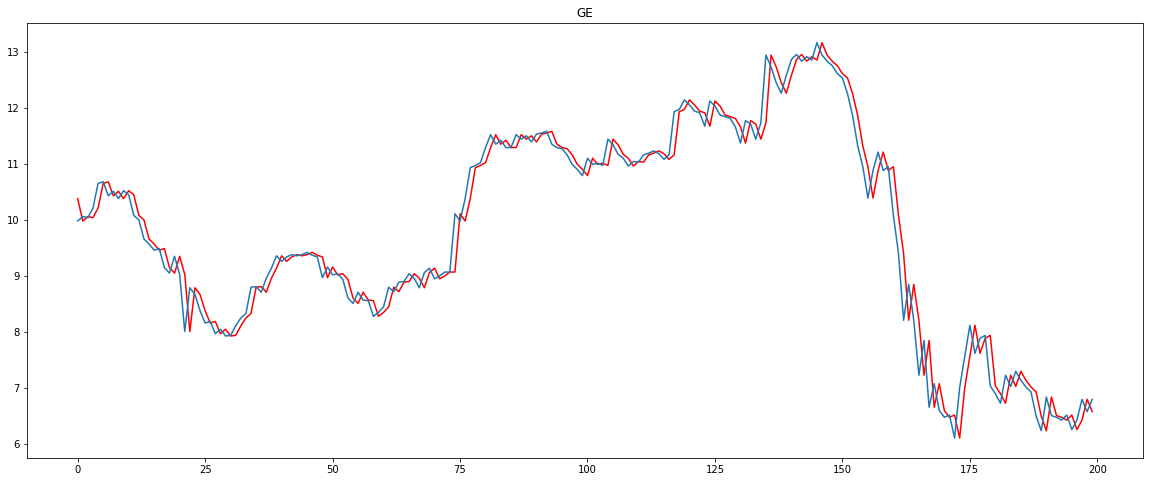

Loss and feature scaled loss on testing data for the company MSFT : (3.1297186108606447, 0.07253113878398791)


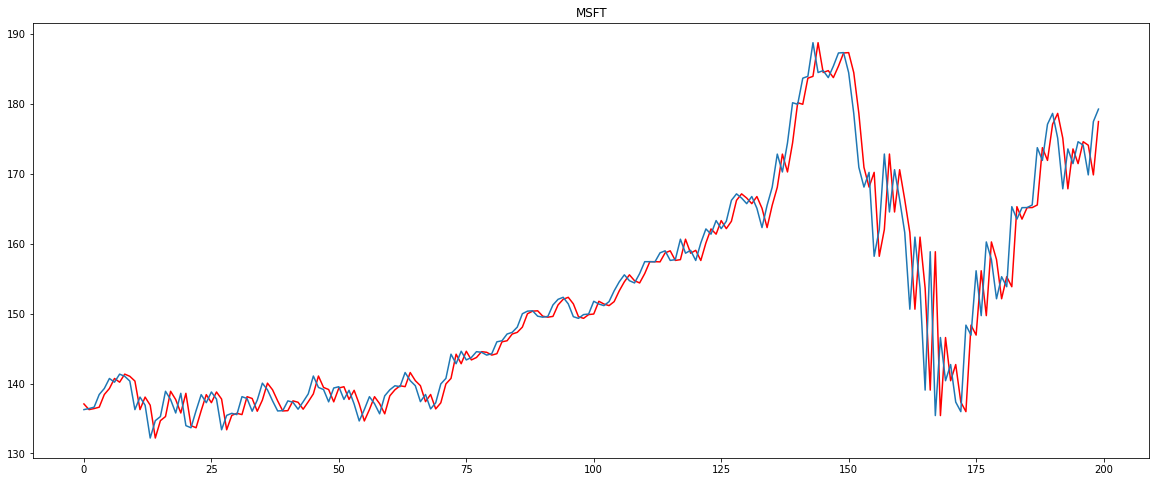

Loss and feature scaled loss on testing data for the company GOOGL : (24.552016106265413, 0.035175252632124315)


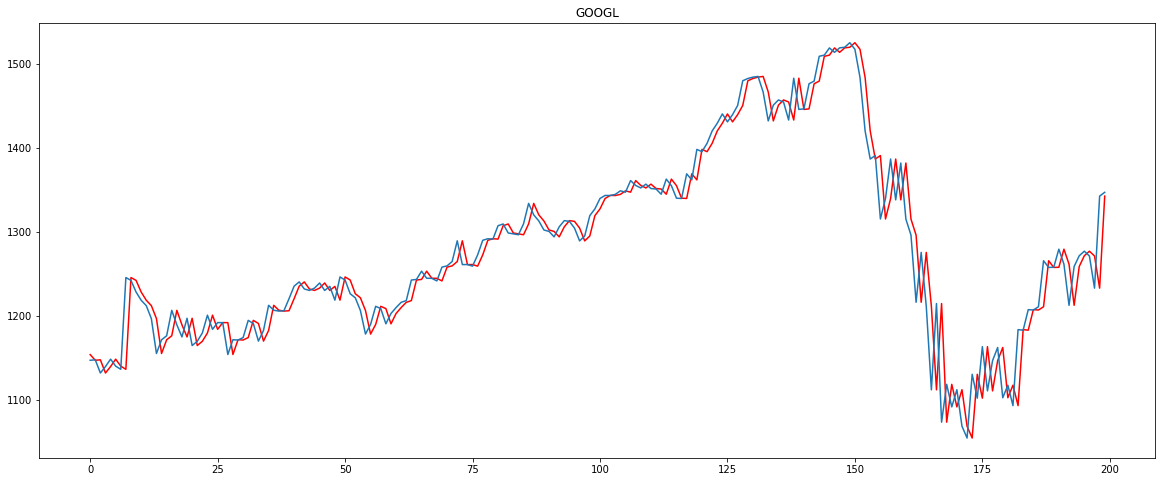

Loss and feature scaled loss on testing data for the company AAPL : (5.582574791477955, 0.04439019868371303)


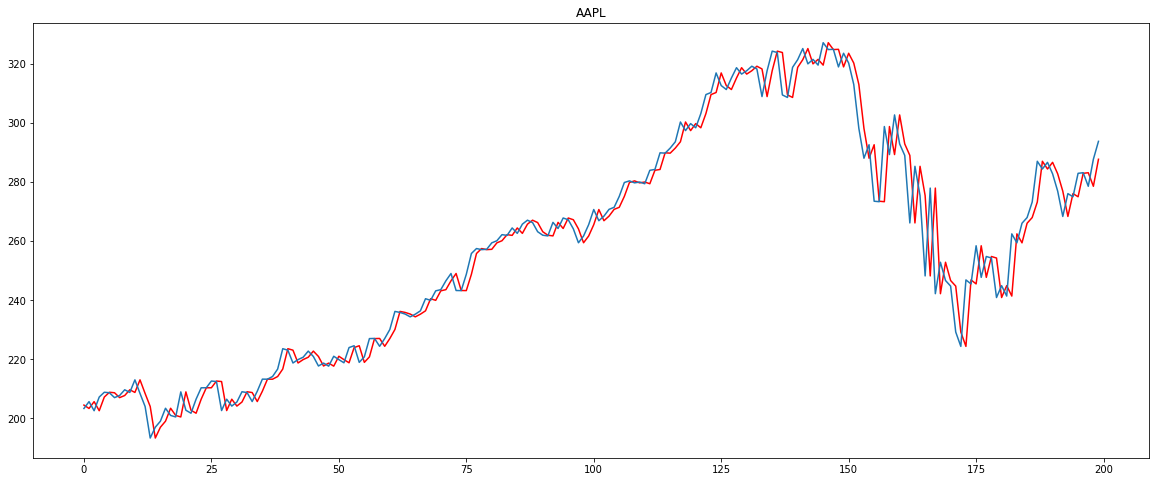

Loss and feature scaled loss on testing data for the company AMZN : (38.386103726574746, 0.046910147257597255)


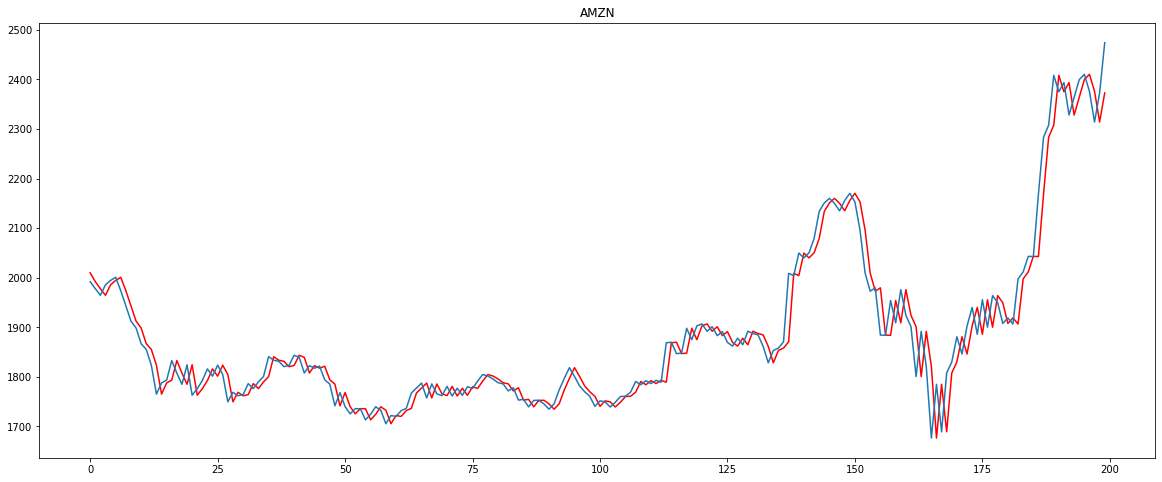

Loss and feature scaled loss on testing data for the company IBM : (2.523143403547278, 0.01751453083910938)


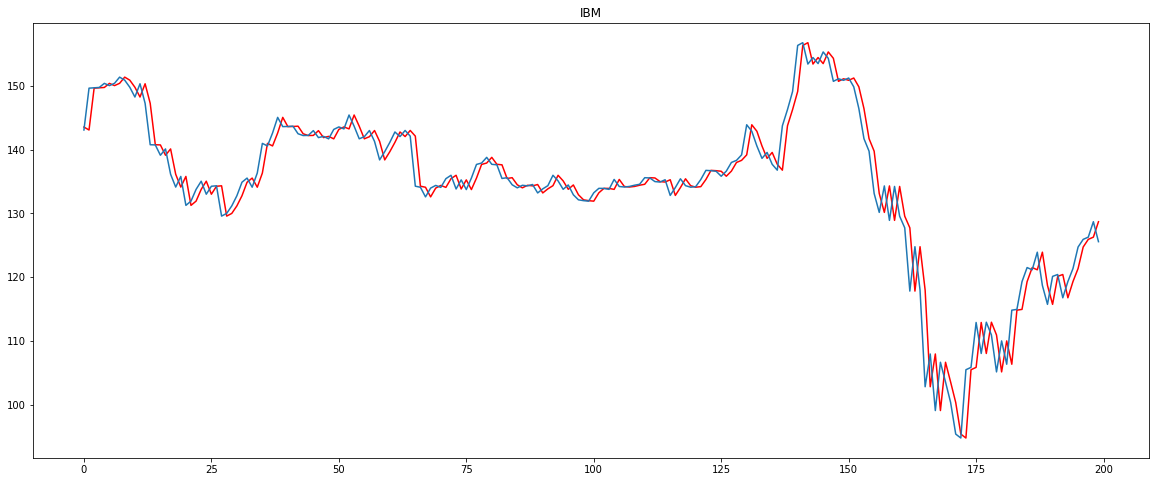

Loss and feature scaled loss on testing data for the company CSCO : (0.9429062050711229, 0.04608534288427618)


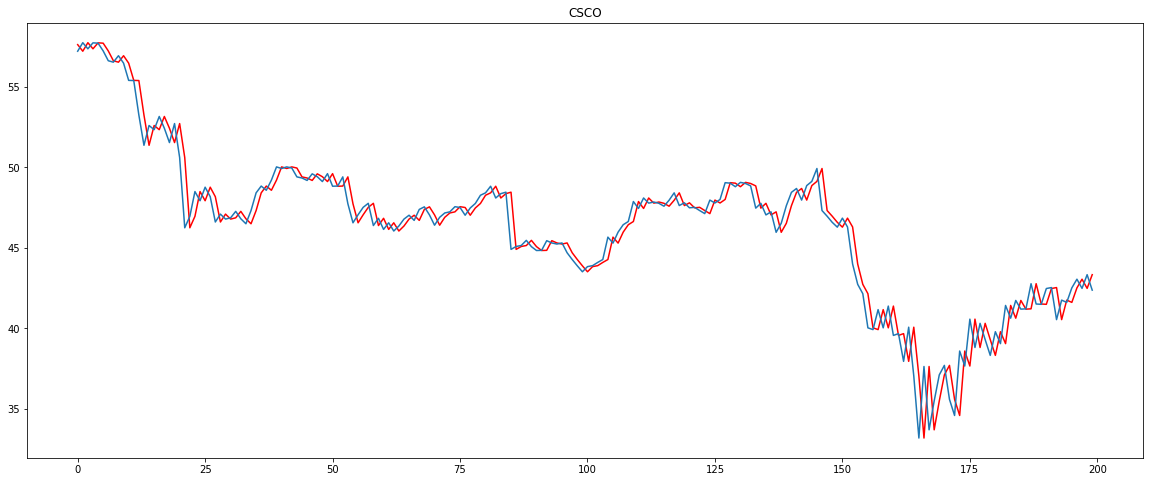

In [53]:
for stock in stocklist:

    model = Last_Value()

    model.fit(X_train[stock],Y_train[stock])

    print("Loss and feature scaled loss on testing data for the company",stock,":",model.evaluate(X_test[stock],Y_test[stock]))

    # plotting the predictions

    y_pred = model.predict(X_test[stock])

    plt.figure(figsize=(20,8))
    plt.title(stock)
    plt.plot(y_pred[-200:],'-r')
    plt.plot(Y_test[stock][-200:],'-')
    plt.show()



# Moving Average

In [17]:
class Moving_Average:

    def __init__(self,n):

        self.n = n

        self.scaler_x = MinMaxScaler(feature_range=(0,1))

        self.scaler_y = MinMaxScaler(feature_range=(0,1))

    def fit(self,X,Y): 

        self.scaler_x = self.scaler_x.fit(X)

        self.scaler_y = self.scaler_y.fit(Y)

    def predict(self,X):
        x = self.scaler_x.transform(X)
        x = x[:,-self.n:]
        pred = np.mean(x,axis=-1)
        pred = self.scaler_y.inverse_transform(pred.reshape(-1,1))
        return pred
    
    def evaluate(self,X,Y):
        
        pred = self.predict(X)
        return self.loss(pred,Y)
    
    def loss(self,pred,Y):
        pred = self.scaler_y.transform(pred)
        y = self.scaler_y.transform(Y)
        loss = math.sqrt(mean_squared_error(y,pred))
        return loss       

In [19]:
import math
error_list = []
for n in range(1,sequence_length+1):

    error_at_n = []
    model = Moving_Average(n)

    for stock in stocklist:

        x = X_test[stock]
        y = Y_test[stock]
        model.fit(X_train[stock],Y_train[stock])
        
        error_at_n.append(model.evaluate(x,y))
    
    error_list.append(np.mean(np.asarray(error_at_n)))

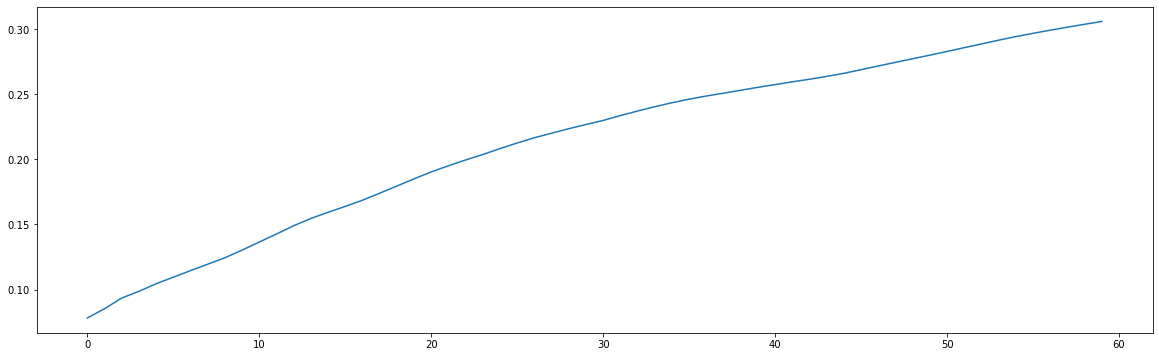

In [20]:
plt.figure(figsize=(20,6))
plt.plot(error_list)
plt.show()

In [0]:
error_list = []
for n in range(0,11):

    error_at_n = []
    model = Moving_Average(n)

    for stock in stocklist:

        x = X_test[stock]
        y = Y_test[stock]
        model.fit(X_train[stock],Y_train[stock])
        
        error_at_n.append(model.evaluate(x,y))
    
    error_list.append(np.mean(np.asarray(error_at_n)))

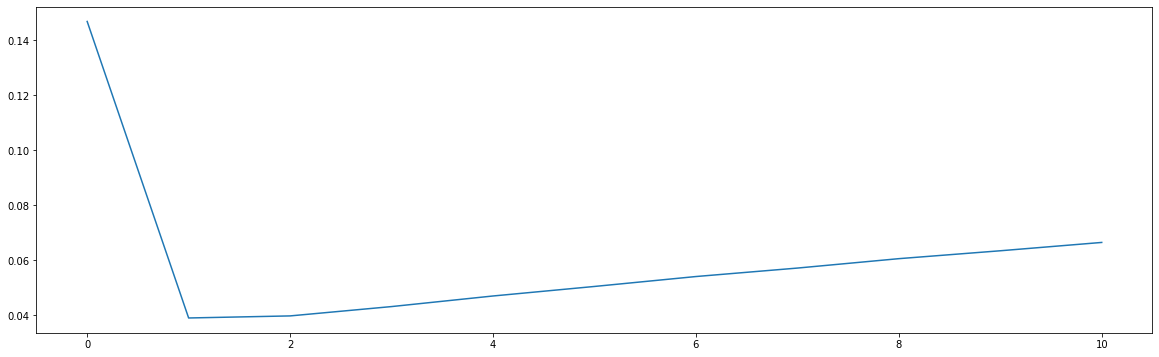

In [58]:
plt.figure(figsize=(20,6))
plt.plot(error_list)
plt.show()

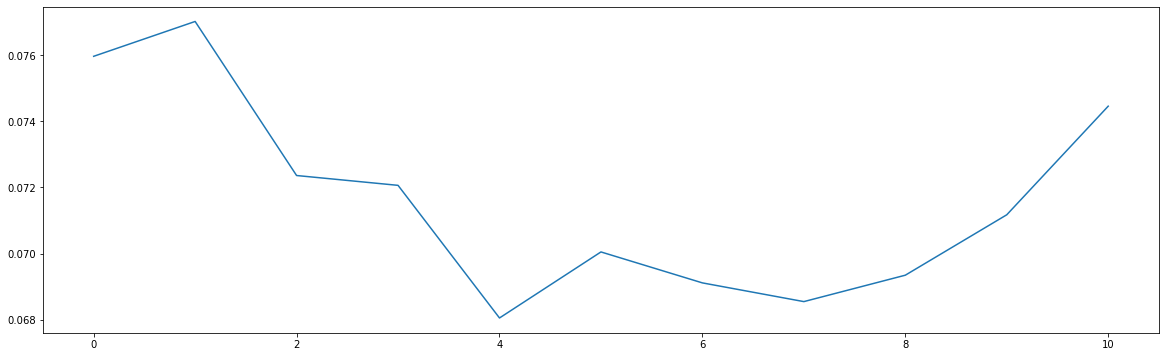

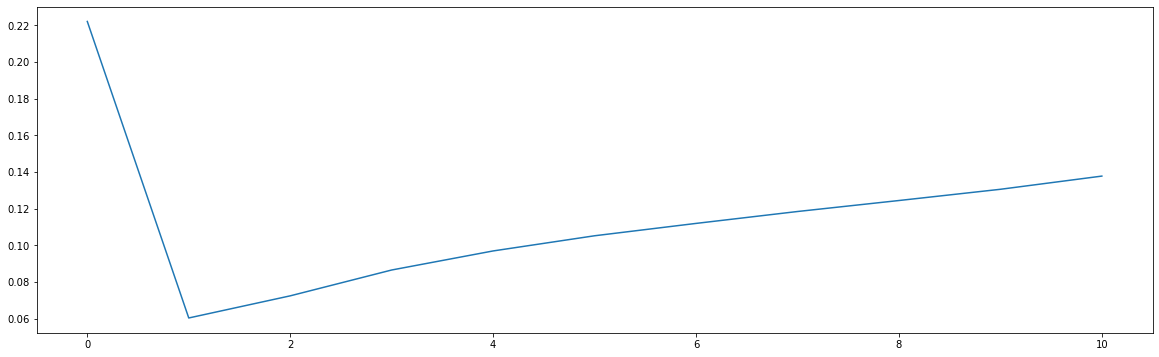

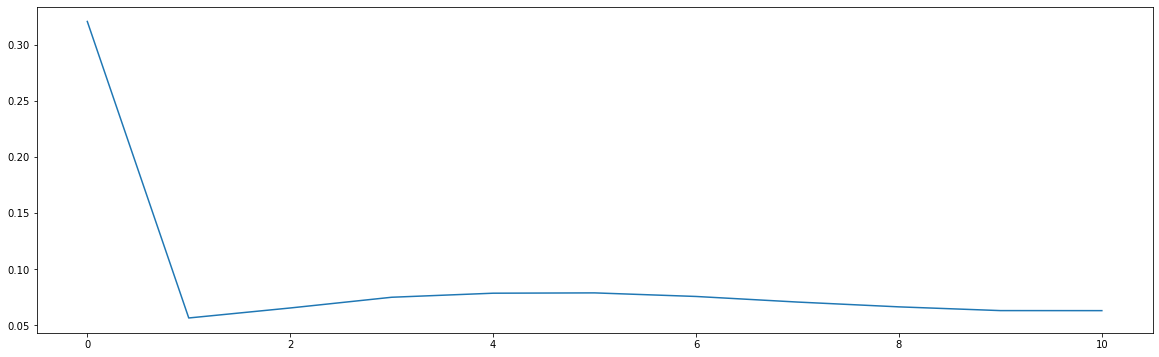

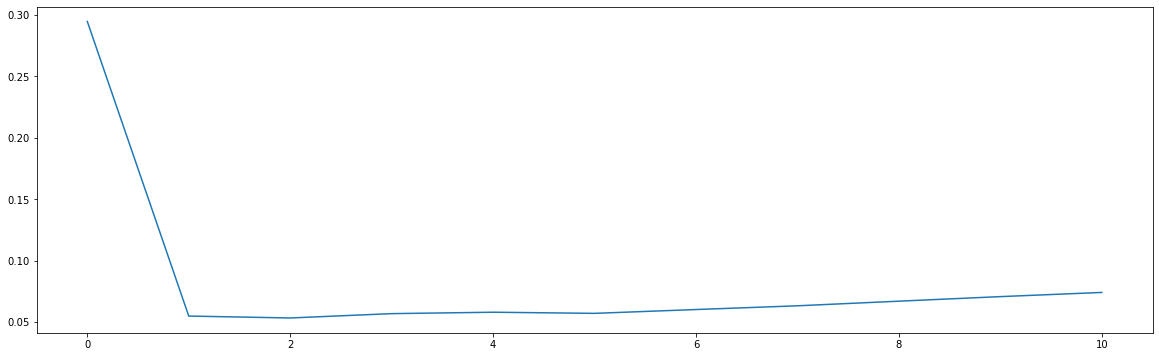

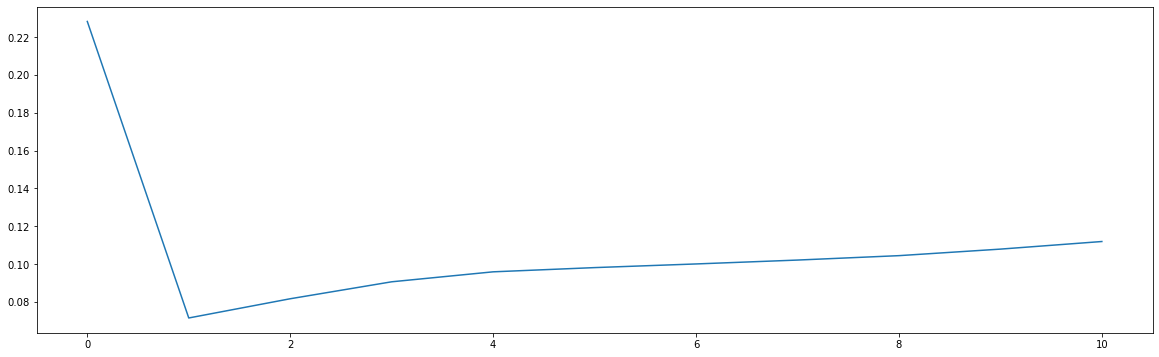

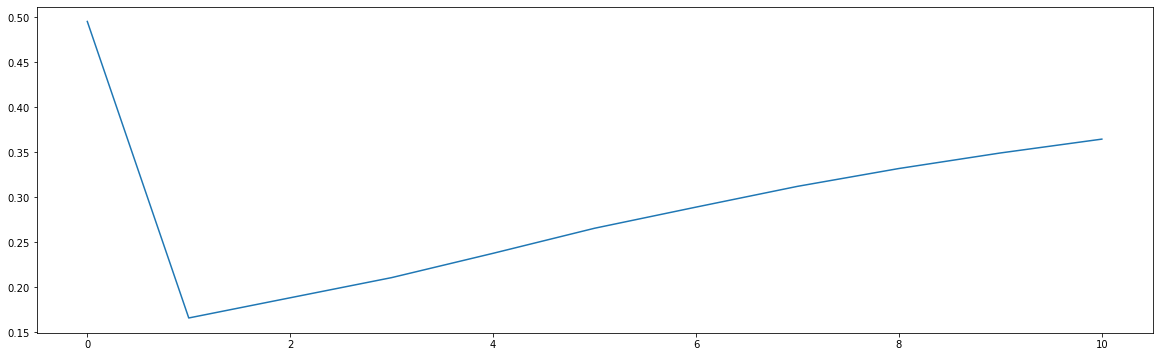

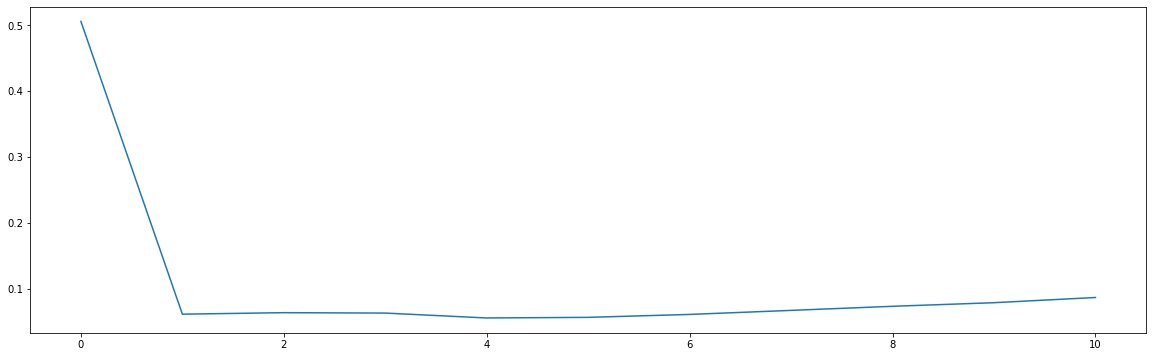

In [21]:
for stock in stocklist:

    stock_preds = []

    x = X_test[stock]
    y = Y_test[stock]

    for n in range(0,11):

        model = Moving_Average(n)
        model.fit(X_train[stock],Y_train[stock])
        
        stock_preds.append(model.evaluate(x,y))
    
    plt.figure(figsize=(20,6))
    plt.plot(stock_preds)
    plt.show()

Loss on moving average of 15 days on testing data for the company GE : 0.023650672358230006


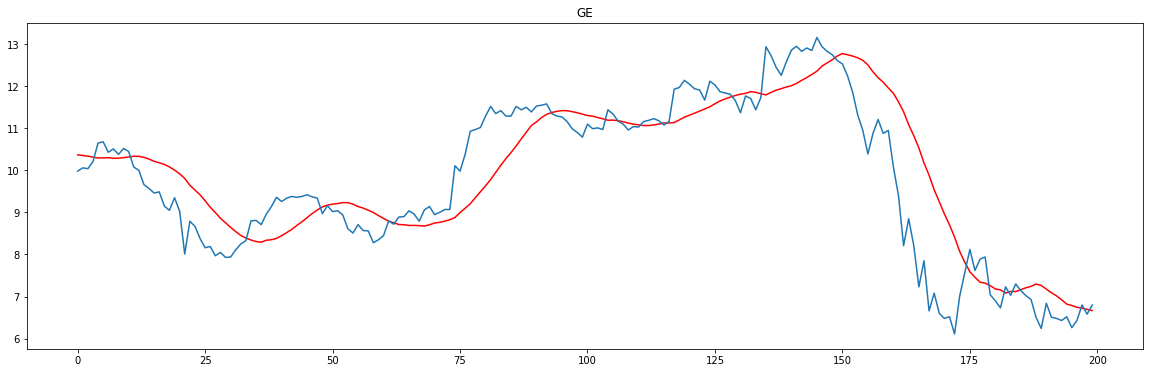

Loss on moving average of 15 days on testing data for the company MSFT : 0.1289164828108631


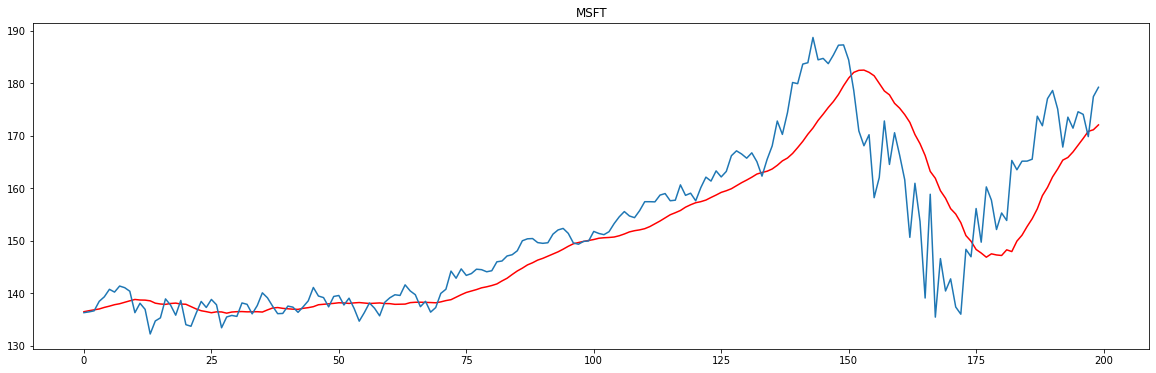

Loss on moving average of 15 days on testing data for the company GOOGL : 0.07302419549943301


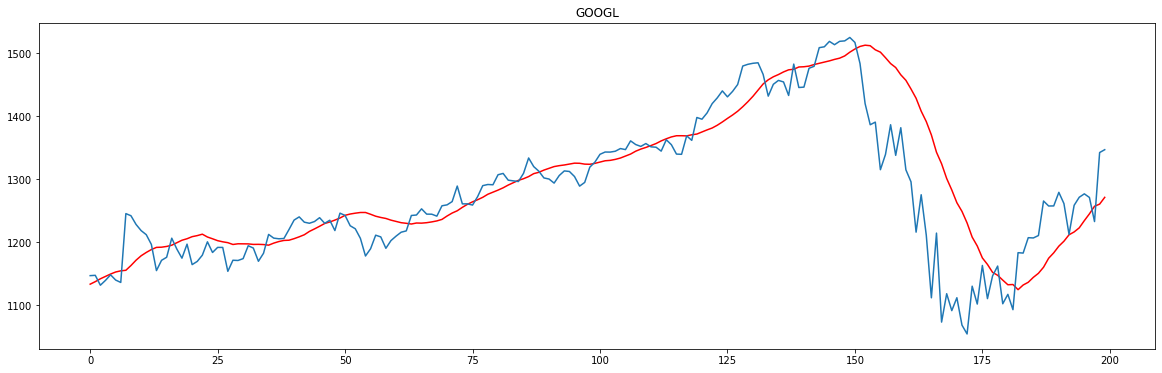

Loss on moving average of 15 days on testing data for the company AAPL : 0.08914850099883345


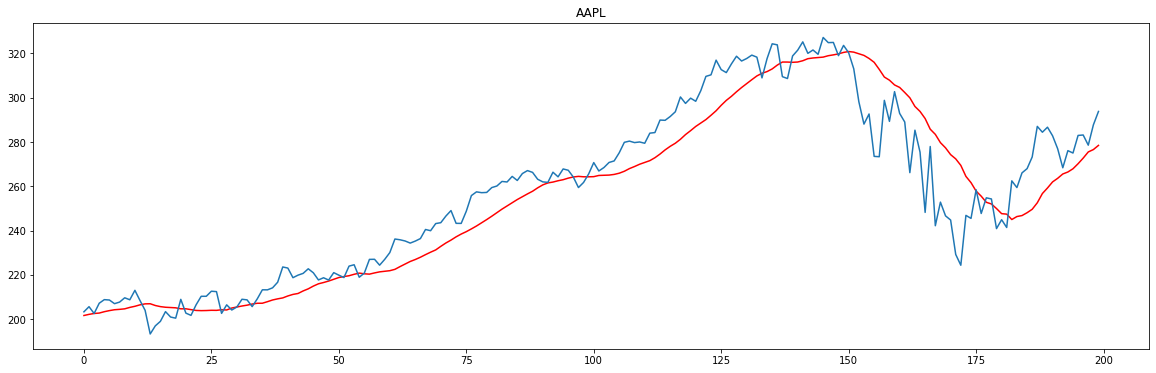

Loss on moving average of 15 days on testing data for the company AMZN : 0.10703032016527034


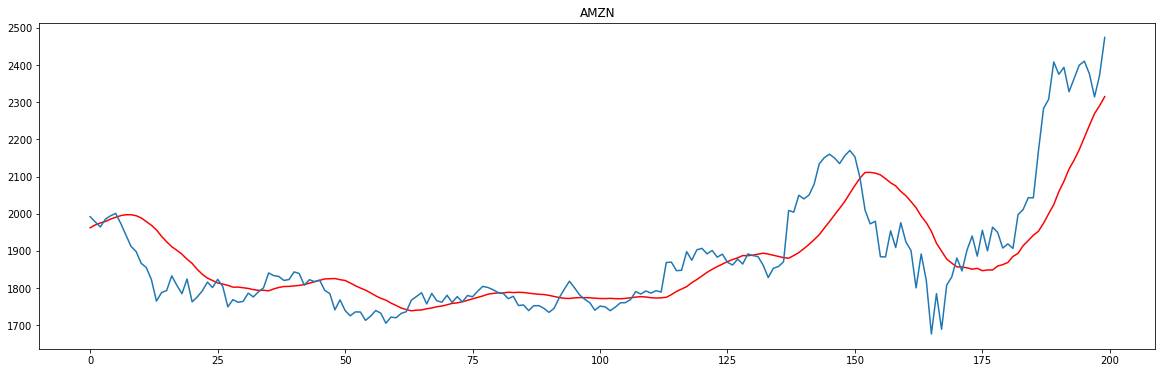

Loss on moving average of 15 days on testing data for the company IBM : 0.04480472371994962


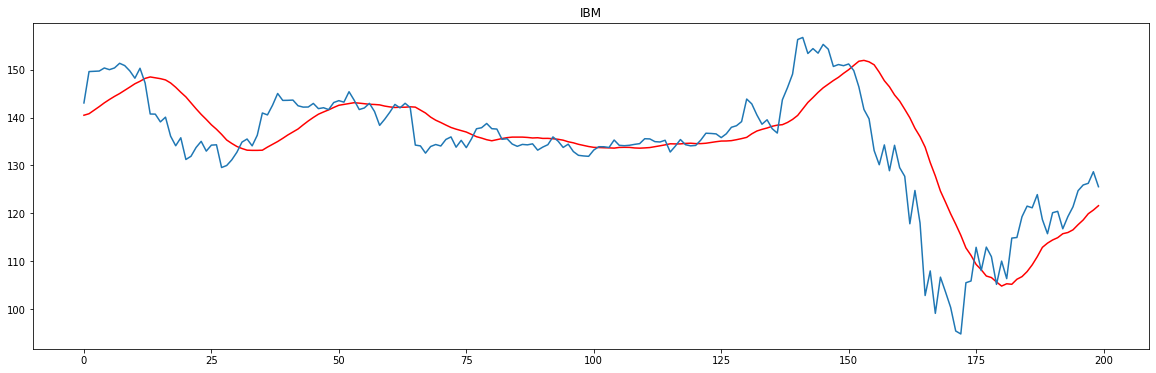

Loss on moving average of 15 days on testing data for the company CSCO : 0.09626626096259375


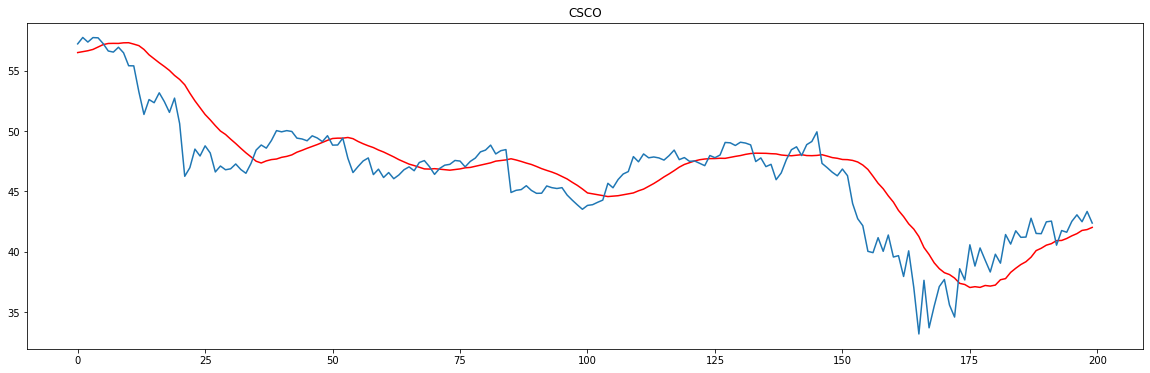

In [60]:
for stock in stocklist:

    model = Moving_Average(15)

    model.fit(X_train[stock],Y_train[stock])

    print("Loss on moving average of 15 days on testing data for the company",stock,":",model.evaluate(X_test[stock],Y_test[stock]))

    # plotting the predictions

    y_pred = model.predict(X_test[stock])

    plt.figure(figsize=(20,6))
    plt.title(stock)
    plt.plot(y_pred[-200:],'-r')
    plt.plot(Y_test[stock][-200:],'-')
    plt.show()



Loss on moving average of 2 days on testing data for the company GE : 0.07235974020740987


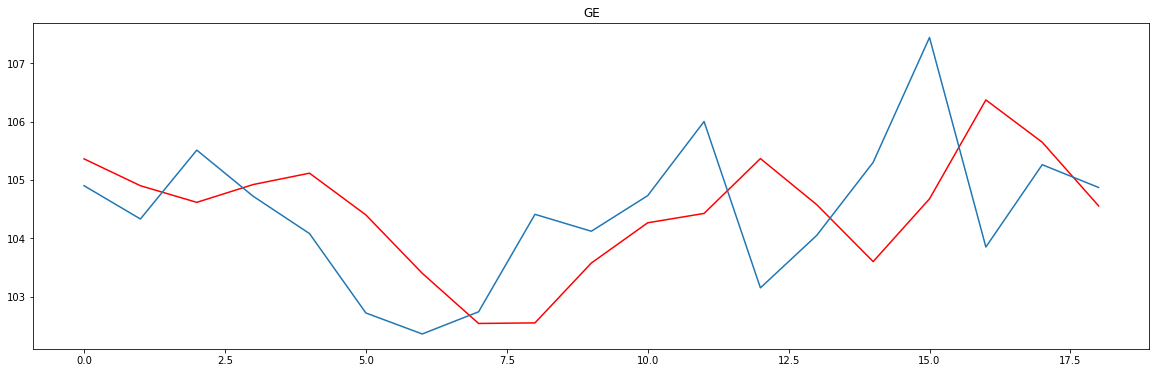

Loss on moving average of 2 days on testing data for the company MSFT : 0.07236439739880293


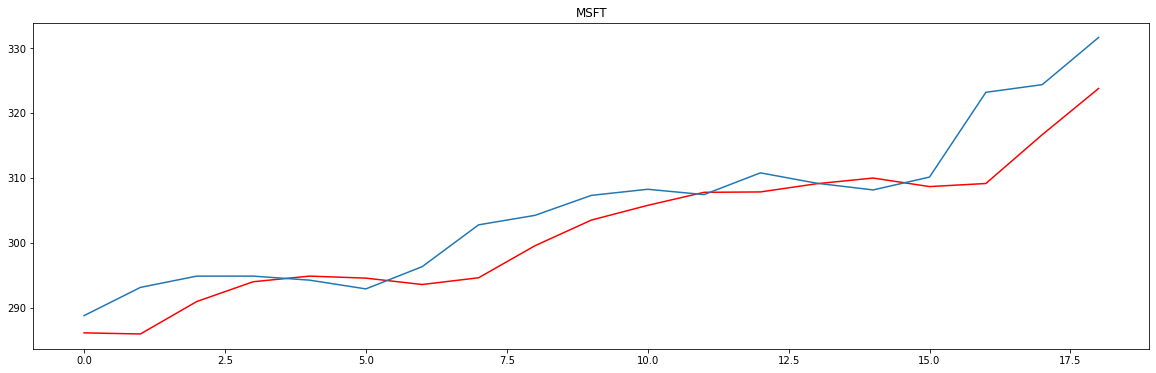

Loss on moving average of 2 days on testing data for the company GOOGL : 0.06524984922093956


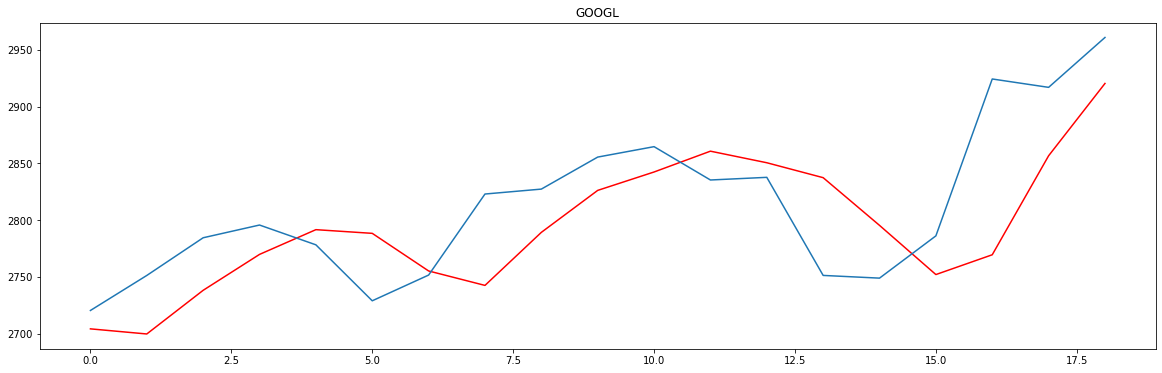

Loss on moving average of 2 days on testing data for the company AAPL : 0.053204463230238384


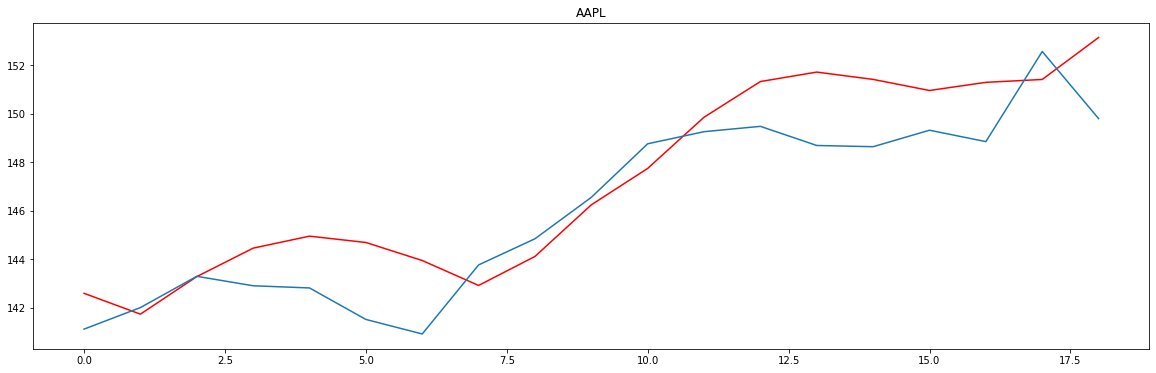

Loss on moving average of 2 days on testing data for the company AMZN : 0.08164975571856756


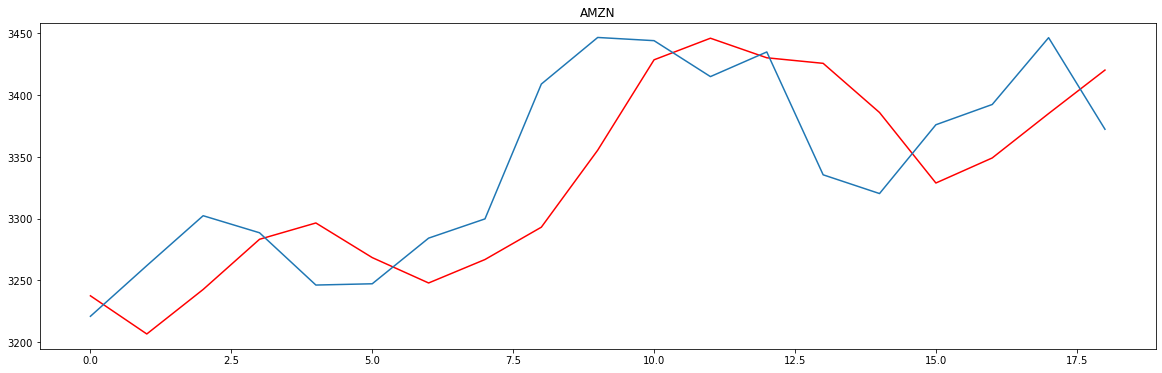

Loss on moving average of 2 days on testing data for the company IBM : 0.18848751628347726


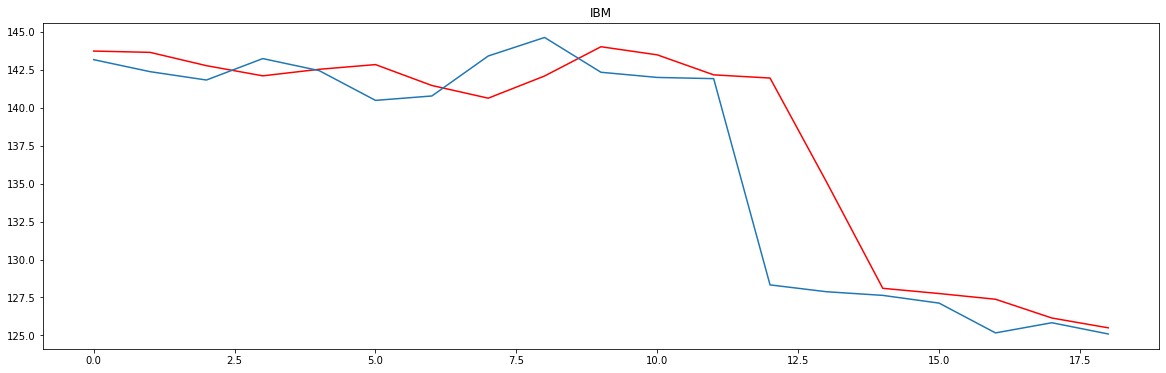

Loss on moving average of 2 days on testing data for the company CSCO : 0.06332065935180169


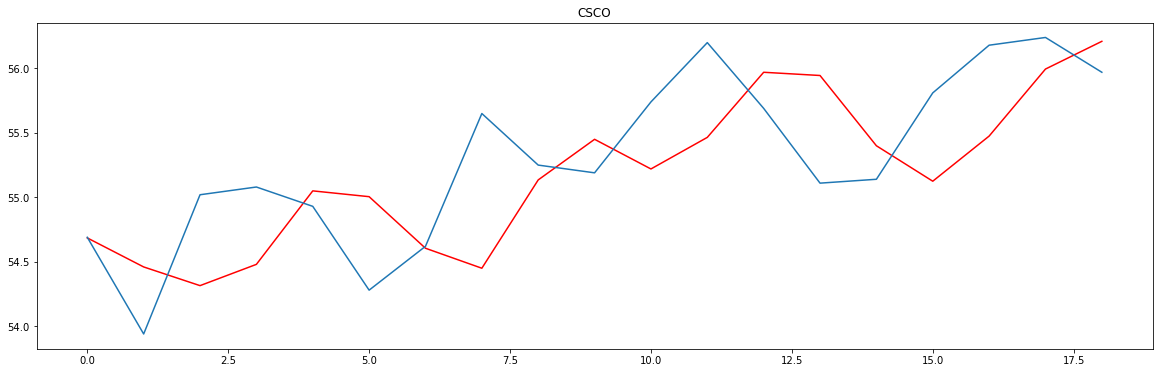

In [22]:
for stock in stocklist:

    model = Moving_Average(2)

    model.fit(X_train[stock],Y_train[stock])

    print("Loss on moving average of 2 days on testing data for the company",stock,":",model.evaluate(X_test[stock],Y_test[stock]))

    # plotting the predictions

    y_pred = model.predict(X_test[stock])

    plt.figure(figsize=(20,6))
    plt.title(stock)
    plt.plot(y_pred[-200:],'-r')
    plt.plot(Y_test[stock][-200:],'-')
    plt.show()



In [23]:
model = Moving_Average(2)

for stock in stocklist:
    model.fit(X_train[stock],Y_train[stock])
    print(stock,"\t",model.evaluate(X_test[stock],Y_test[stock]))

GE 	 0.07235974020740987
MSFT 	 0.07236439739880293
GOOGL 	 0.06524984922093956
AAPL 	 0.053204463230238384
AMZN 	 0.08164975571856756
IBM 	 0.18848751628347726
CSCO 	 0.06332065935180169


# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
import math

class Linear_Model:

    def __init__(self):
        self.n = None
        self.model = LinearRegression()
        return 
    
    def fit(self,X,Y,n):

        self.n = n
        X = X[:,-n:]
        self.model.fit(X,Y)
        return

    
    def predict(self,X):

        x = X[:,-self.n:]
        pred = self.model.predict(x)

        return pred
    
    
    def evaluate(self,X,Y):

        pred = self.predict(X)

        return self.loss(pred,Y)
    

    def loss(self,pred,Y):
        scaler = MinMaxScaler()
        y = scaler.fit_transform(Y)
        pred = scaler.transform(pred)
        loss = math.sqrt(mean_squared_error(y,pred)) 

        return loss

In [28]:
error_list = []
for n in range(1,sequence_length+1):

    error_at_n = []

    model = Linear_Model()

    for stock in stocklist:
        model.fit(X_train[stock],Y_train[stock],n)

    for stock in stocklist:

        x = X_test[stock]
        y = Y_test[stock]        
        error_at_n.append(model.evaluate(x,y))
    
    error_list.append(np.mean(np.asarray(error_at_n)))

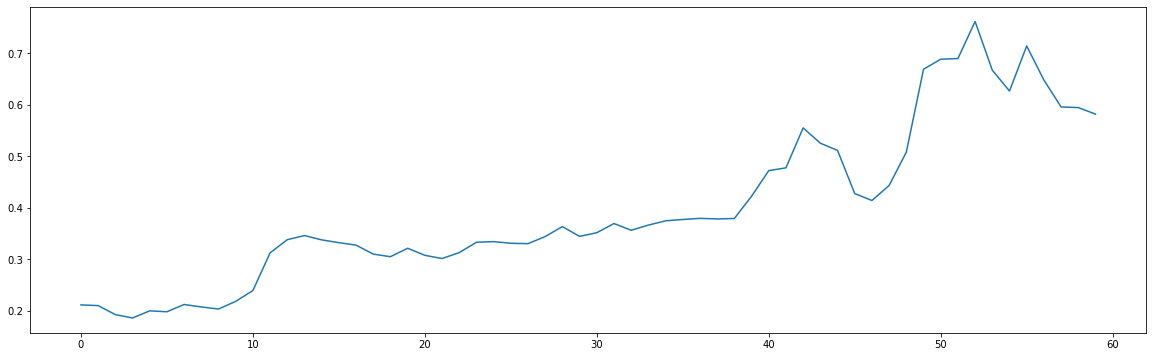

In [29]:
plt.figure(figsize=(20,6))
plt.plot(error_list)
plt.show()

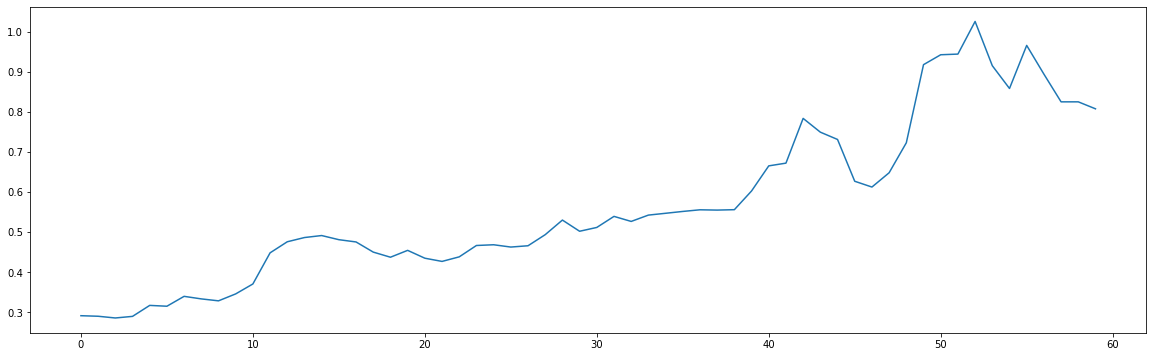

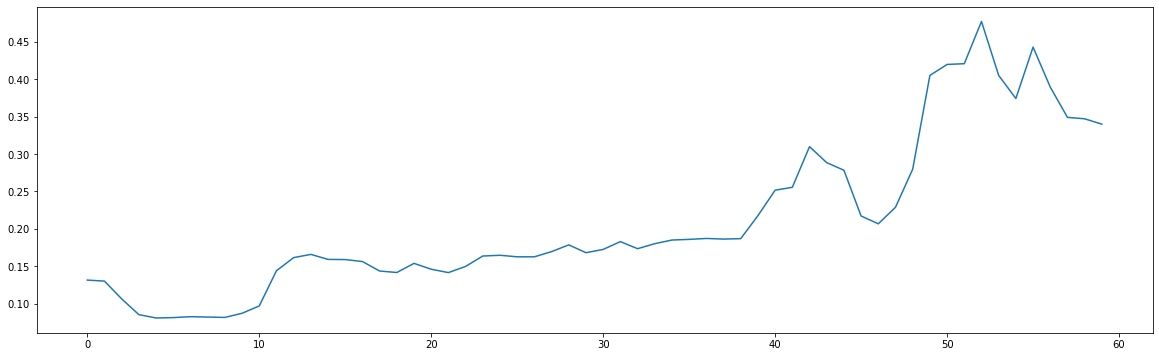

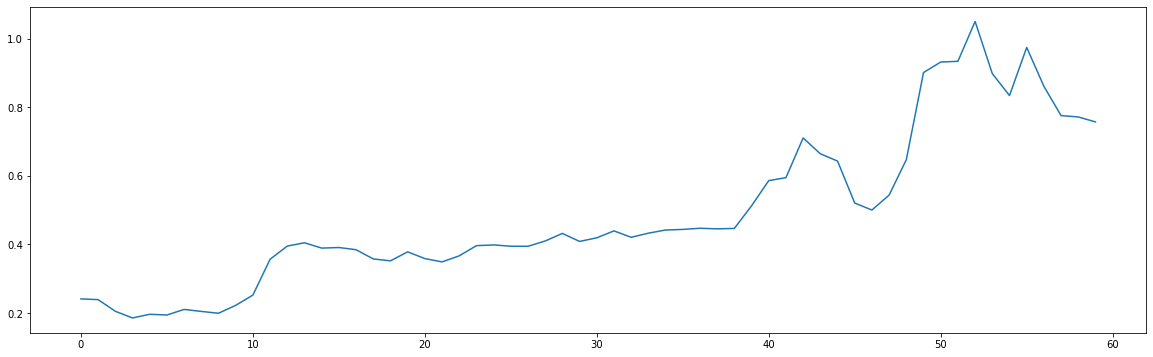

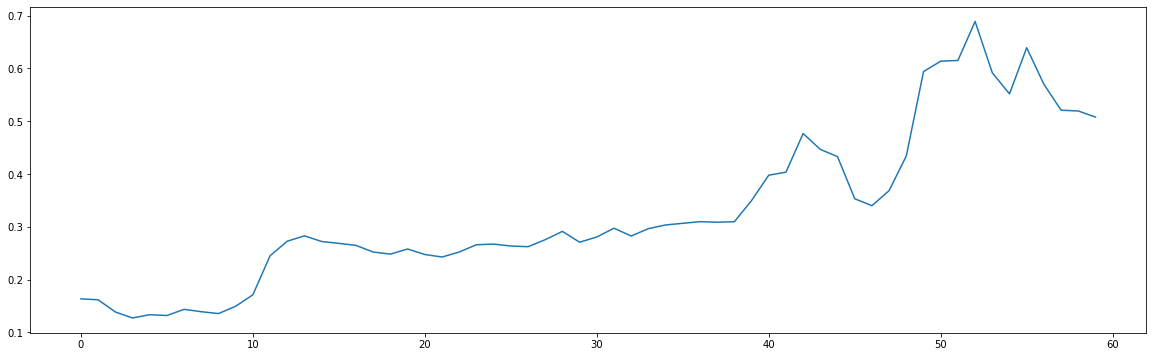

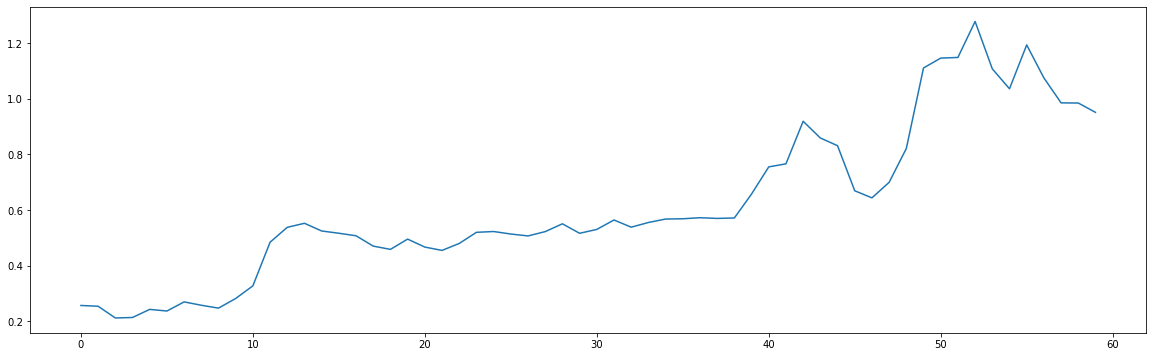

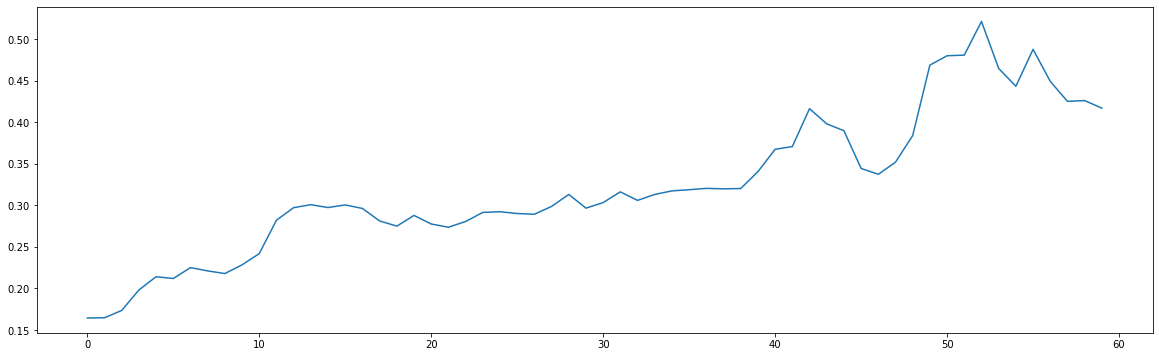

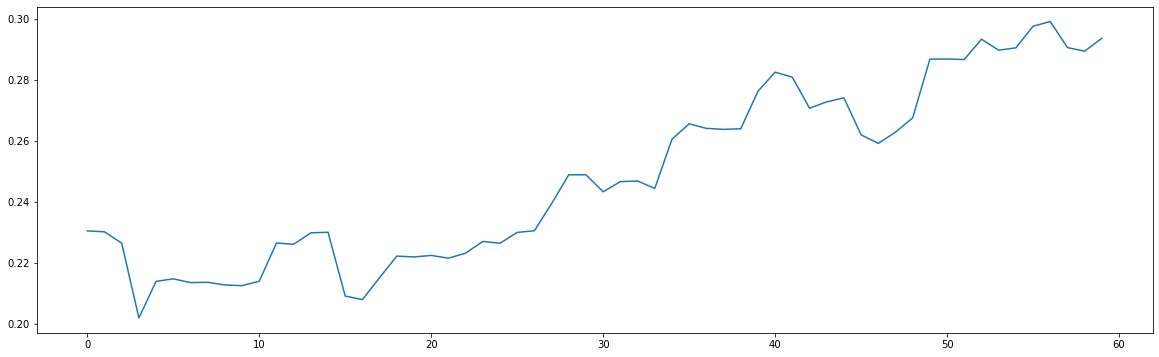

In [30]:
stock_list = [None]*len(stocklist)

for n in range(1,sequence_length+1):

    model = Linear_Model()
    for stock in stocklist:
        model.fit(X_train[stock],Y_train[stock],n)
    
    for i,stock in enumerate(stocklist):
        if(stock_list[i] is None): stock_list[i] = [] 
        stock_list[i].append(model.evaluate(X_test[stock],Y_test[stock]))
    
for i,stock in enumerate(stocklist):
    plt.figure(figsize=(20,6))
    plt.plot(stock_list[i])
    plt.show()

Loss on regression over 16 days on testing data for the company GE : 0.4805366163337673


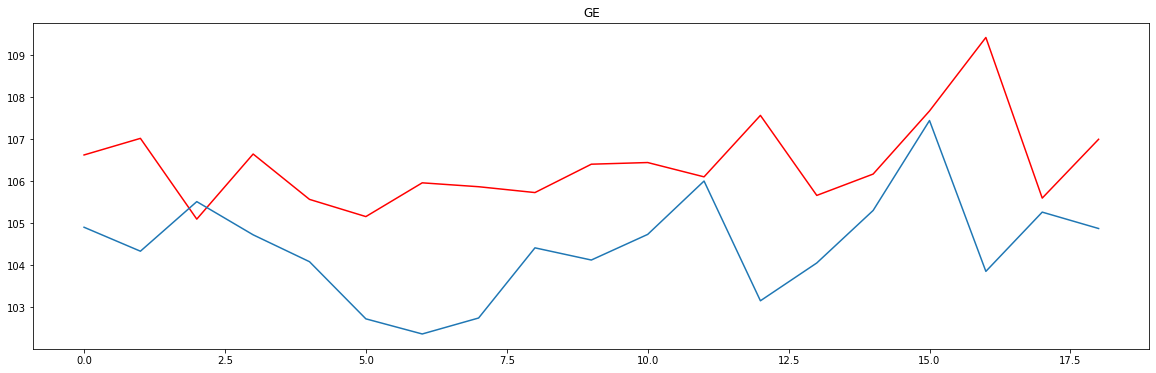

Loss on regression over 16 days on testing data for the company MSFT : 0.15889560405974784


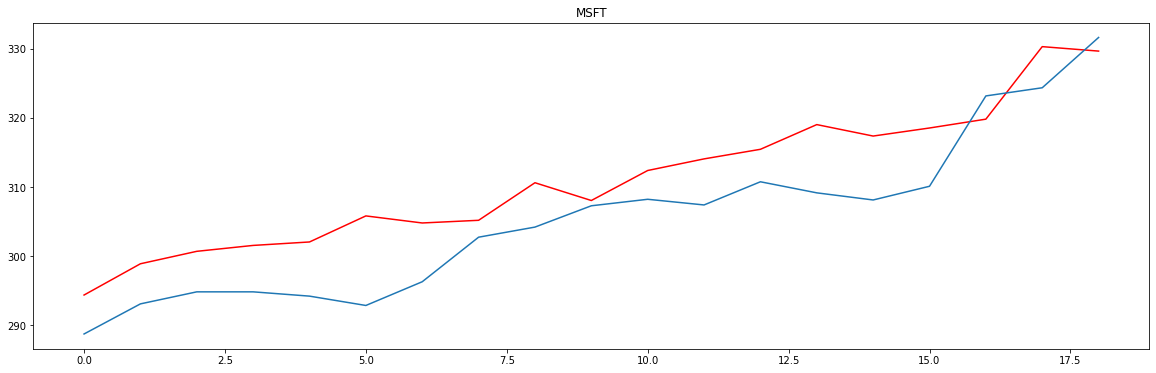

Loss on regression over 16 days on testing data for the company GOOGL : 0.3910720002469673


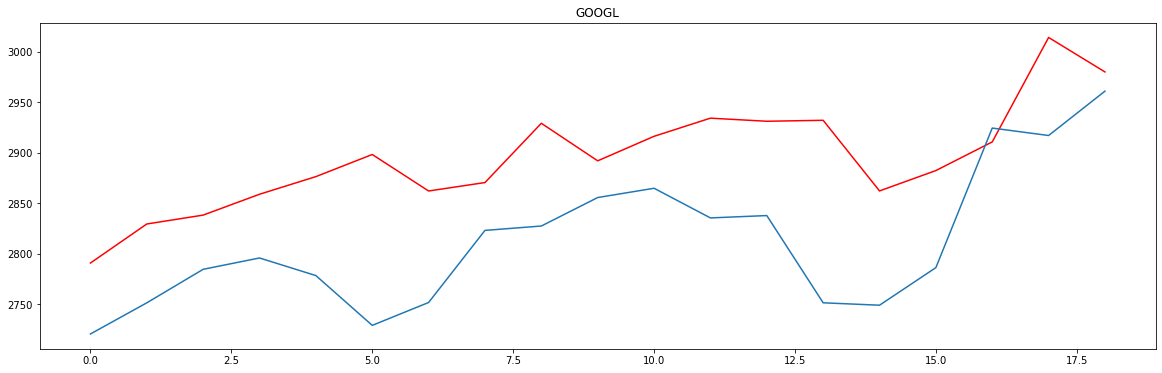

Loss on regression over 16 days on testing data for the company AAPL : 0.2686867379923339


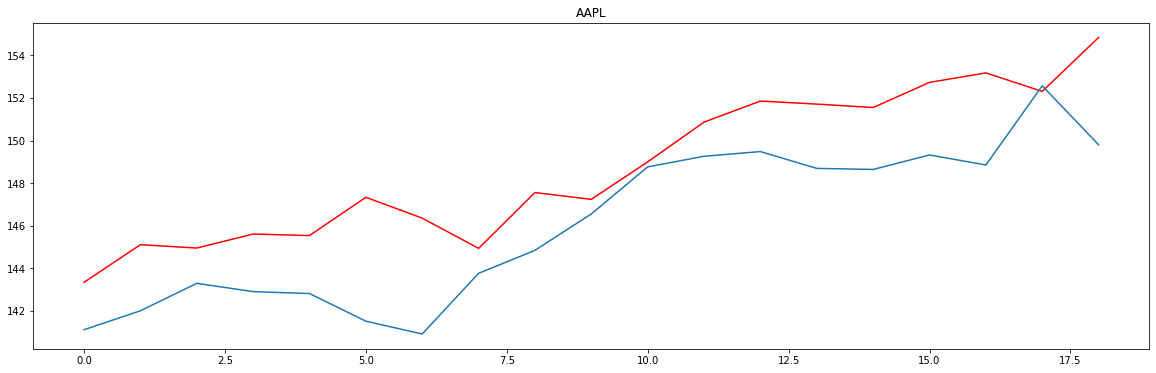

Loss on regression over 16 days on testing data for the company AMZN : 0.516958193648965


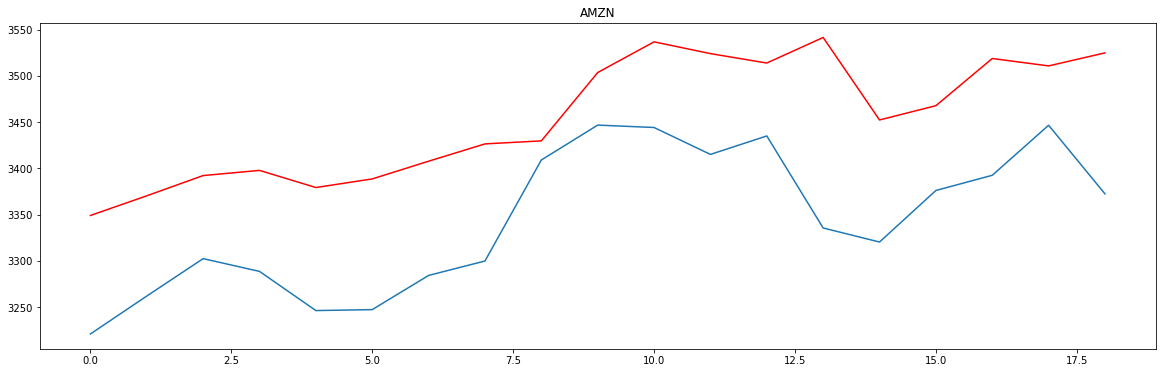

Loss on regression over 16 days on testing data for the company IBM : 0.30058881426370526


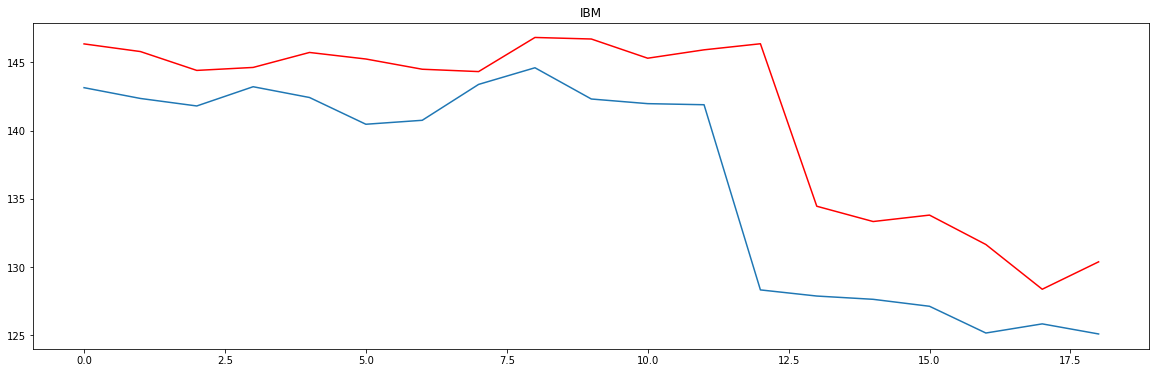

Loss on regression over 16 days on testing data for the company CSCO : 0.20906922221031138


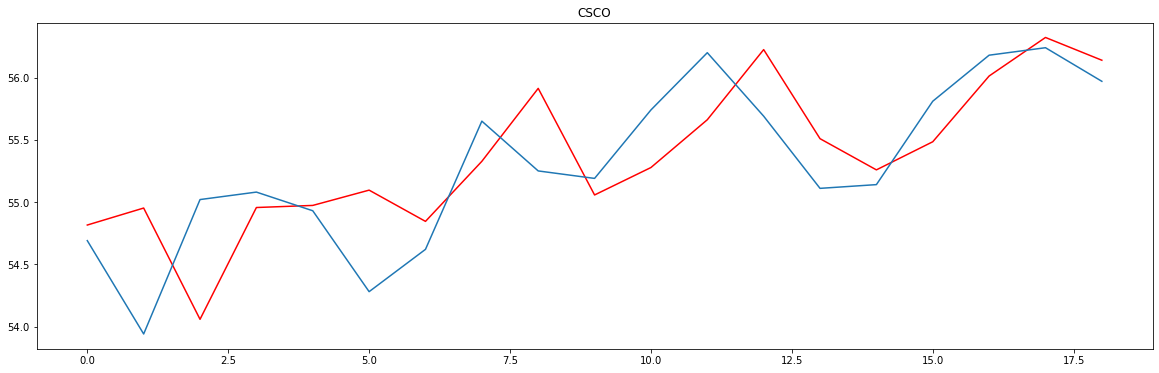

In [31]:
model = Linear_Model()

for stock in stocklist:

    model.fit(X_train[stock],Y_train[stock],16)

for stock in stocklist:

    print("Loss on regression over 16 days on testing data for the company",stock,":",model.evaluate(X_test[stock],Y_test[stock]))

    # plotting the predictions

    y_pred = model.predict(X_test[stock])

    plt.figure(figsize=(20,6))
    plt.title(stock)
    plt.plot(y_pred[-200:],'-r')
    plt.plot(Y_test[stock][-200:],'-')
    plt.show()

In [32]:
for stock in stocklist:
    print(stock,"\t",model.evaluate(X_test[stock],Y_test[stock]))

GE 	 0.4805366163337673
MSFT 	 0.15889560405974784
GOOGL 	 0.3910720002469673
AAPL 	 0.2686867379923339
AMZN 	 0.516958193648965
IBM 	 0.30058881426370526
CSCO 	 0.20906922221031138


# Exponential Moving Average

In [33]:
class EMA:

    def __init__(self, beta):

        self.beta = beta
    
    def predict(self,X):

        pred = np.zeros((X.shape[0],1))
        
        for i in range(X.shape[-1]):

            t = i+1
            
            pred = np.add(np.multiply(self.beta, pred), np.multiply((1 - self.beta),X[:,i].reshape(-1,1)) )

            pred = np.divide(pred,(1 - (self.beta)**t))
        
        return pred
    
    def evaluate(self,X,Y):

        pred = self.predict(X)

        return self.loss(pred,Y)
    
    def loss(self,pred,Y):

        scaler = MinMaxScaler()

        Y = scaler.fit_transform(Y)

        pred = scaler.transform(pred)
        
        loss = math.sqrt(mean_squared_error(Y,pred)) 

        return loss

In [34]:
beta_list = [0.4,0.5,0.6,0.75,0.8,0.9,0.95,0.98]

error_list = []
for beta in beta_list:

    error_at_beta = []
    model = EMA(beta = beta)

    for stock in stocklist:

        x = X_test[stock]
        y = Y_test[stock]

        error_at_beta.append(model.evaluate(x,y))
    
    error_list.append(np.mean(np.asarray(error_at_beta)))

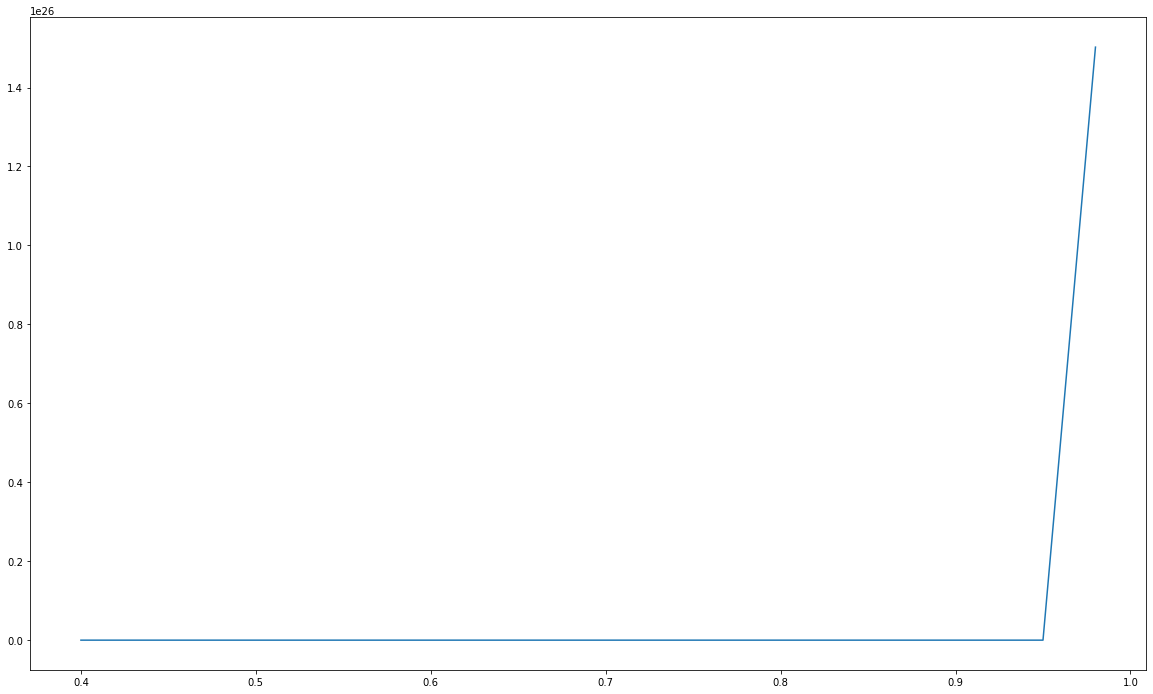

In [35]:
plt.figure(figsize=(20,12))
plt.plot(beta_list,error_list)
plt.show()

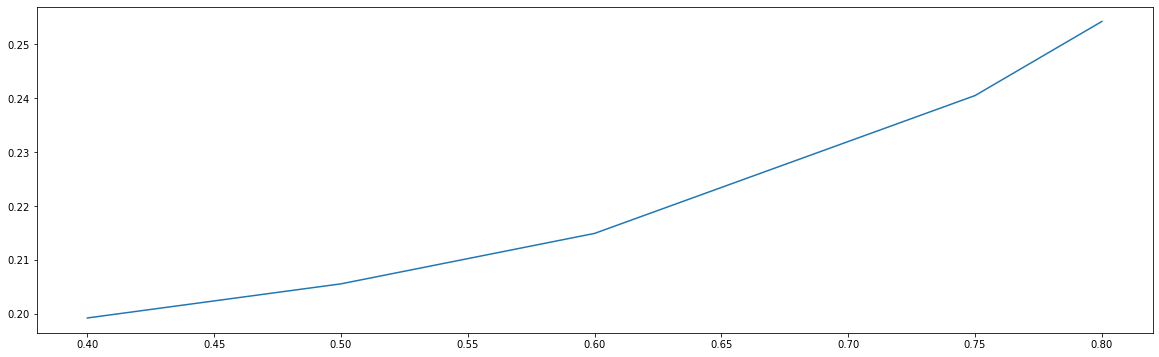

In [36]:
plt.figure(figsize=(20,6))
plt.plot(beta_list[:5],error_list[:5])
plt.show()

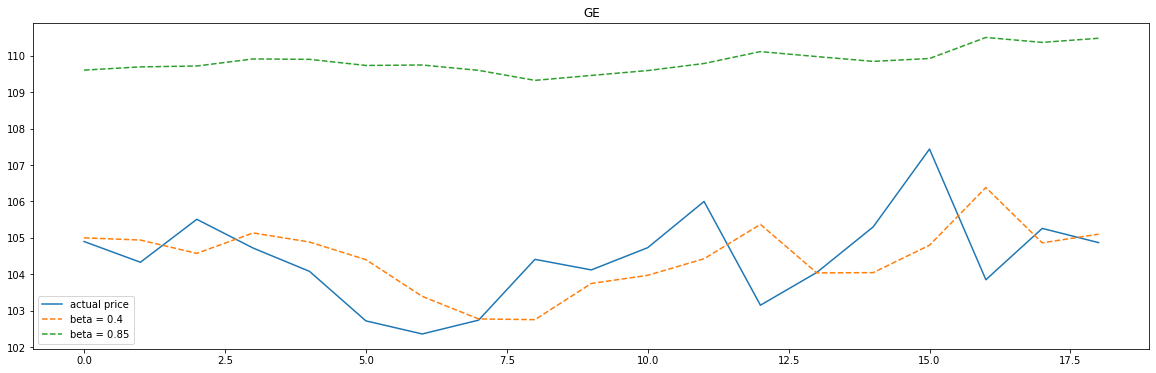

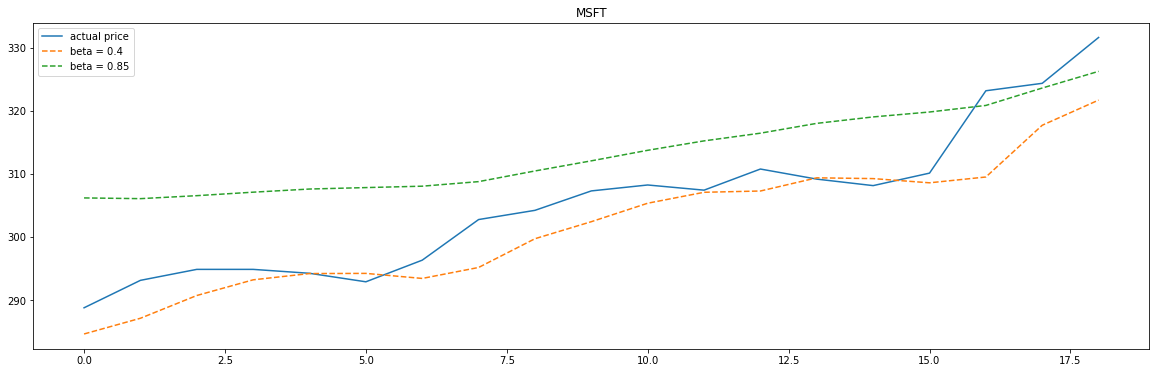

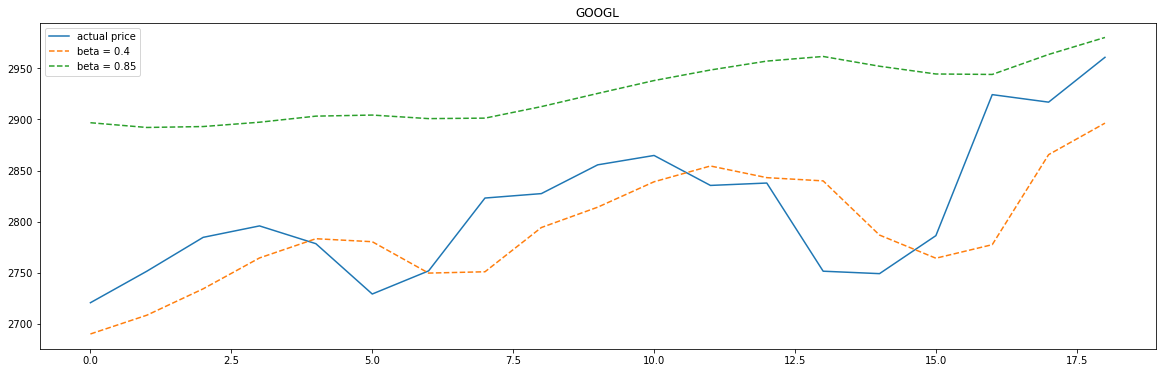

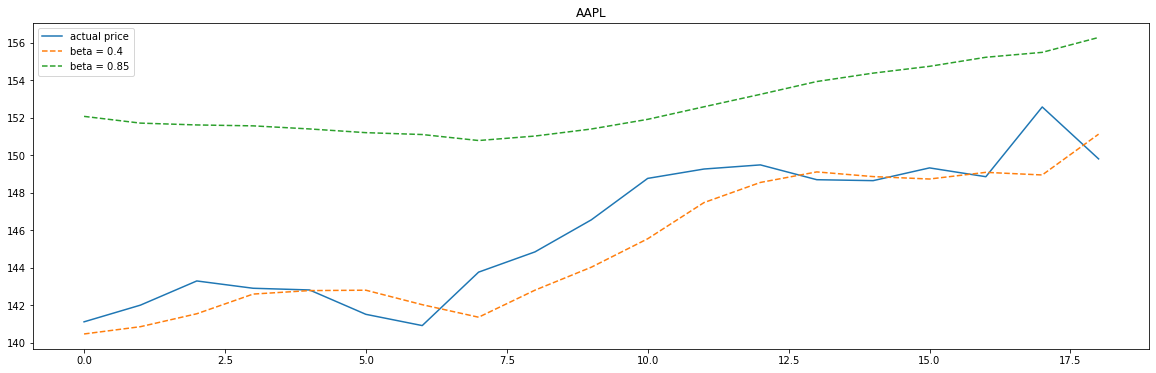

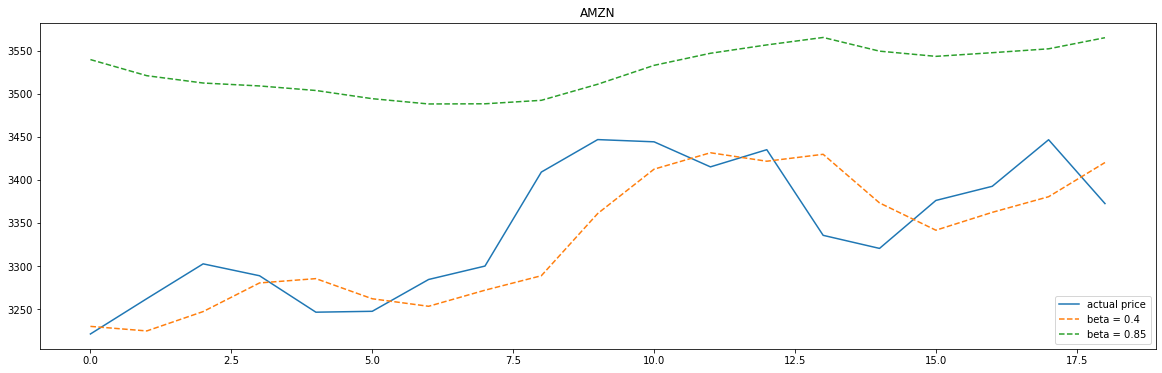

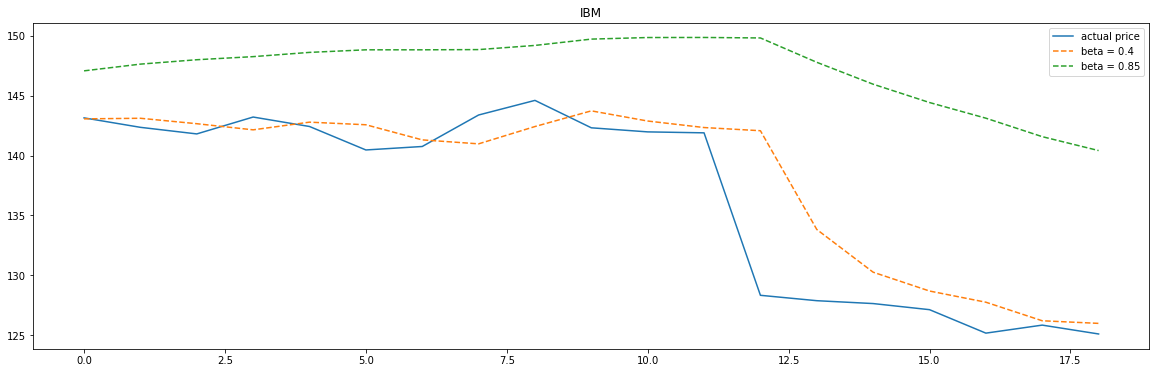

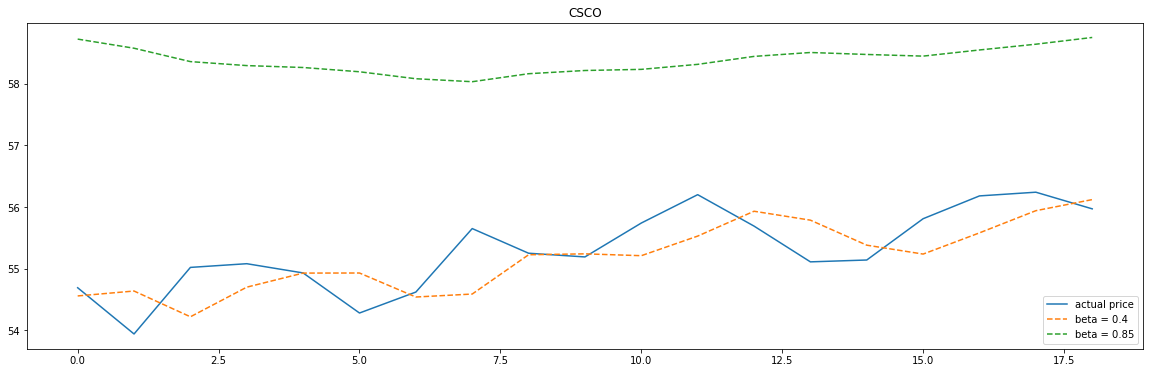

In [37]:
b_list = [0.4,0.85]

for stock in stocklist:

    model = {}
    for beta in b_list:
        model[beta] = EMA(beta)

    # plotting the predictions

    plt.figure(figsize=(20,6))
    plt.title(stock)

    plt.plot(Y_test[stock])
    
    for beta in b_list:
        pred = model[beta].predict(X_test[stock])
        plt.plot(pred,'--')
    
    plt.legend(['actual price','beta = 0.4','beta = 0.85'])
    plt.show()

In [39]:
b_list = [0.4,0.85,0.90]

for b in b_list:
    model = EMA(b)
    print("Beta =",b)
    for stock in stocklist:
        print(stock,"\t",model.evaluate(X_test[stock],Y_test[stock]))
    print("\n")

Beta = 0.4
GE 	 0.25558487022051735
MSFT 	 0.12430739344154661
GOOGL 	 0.22628840221209176
AAPL 	 0.1447117312829302
AMZN 	 0.23138132465517147
IBM 	 0.19039248709454826
CSCO 	 0.22206191329951974


Beta = 0.85
GE 	 1.0911729095823774
MSFT 	 0.2298328257837893
GOOGL 	 0.5278140821185848
AAPL 	 0.608585846422184
AMZN 	 0.8637448039426728
IBM 	 0.6233799986179754
CSCO 	 1.367408753479312


Beta = 0.9
GE 	 3545.222449405496
MSFT 	 1162.556559420148
GOOGL 	 1913.9905515753446
AAPL 	 2202.6961739752087
AMZN 	 2762.6303730040204
IBM 	 1269.515231628923
CSCO 	 4165.207213824101


